## Import

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
from keras.models import Sequential
from keras.layers import Input, Dense

## Load Dataset

In [4]:
dataset_path = "./IMDB Dataset.csv"

In [5]:
df = pd.read_csv(dataset_path)

## EDA

In [6]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
reviews_column = df.columns[0]
target_column = df.columns[-1]

In [8]:
df[target_column].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

## Preprocessing

### Drop Duplicates

In [9]:
df = df.drop_duplicates()

In [10]:
df.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


In [11]:
df[target_column].value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

### TF-IDF vectorization

In [12]:
max_features = 5000

In [13]:
tf_idf_vectorizer = TfidfVectorizer(max_features = max_features)

In [14]:
reviews_vectorized = tf_idf_vectorizer.fit_transform(df[reviews_column]).toarray()

In [15]:
reviews_vectorized.shape

(49582, 5000)

### Label Encoding

In [16]:
label_encoder = LabelEncoder()

In [17]:
encoded_sentiment = label_encoder.fit_transform(df[target_column])

In [18]:
encoded_sentiment

array([1, 1, 1, ..., 0, 0, 0])

### Split Dataset

In [19]:
x = reviews_vectorized
y = encoded_sentiment

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y)

In [21]:
x_train.shape, y_train.shape

((37186, 5000), (37186,))

## Train Model

In [22]:
input_shape = (max_features,)
layer_1_units = 256
layer_2_units = 256
output_layer_units = 1 


In [23]:
model = Sequential([
    Input(shape = input_shape ),
    Dense(units = layer_1_units, activation='relu'),
    Dense(units = layer_2_units, activation = 'relu'),
    Dense(units = output_layer_units, activation = 'sigmoid')
])

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │       1,280,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,346,305 (5.14 MB)

 Trainable params: 1,346,305 (5.14 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
optimizer = 'adam'
loss = 'binary_crossentropy'
metrics = ['accuracy']

In [26]:
model.compile(optimizer = optimizer, loss = loss, metrics = metrics)

In [27]:
epochs = 2
batch_size = 32
validation_split = 0.1

In [28]:
model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = validation_split)

Epoch 1/2
1046/1046 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.8298 - loss: 0.3689 - val_accuracy: 0.8895 - val_loss: 0.2605
Epoch 2/2
1046/1046 ━━━━━━━━━━━━━━━━━━━━ 29s 28ms/step - accuracy: 0.9213 - loss: 0.1997 - val_accuracy: 0.8906 - val_loss: 0.2821


In [29]:
loss, accuracy = model.evaluate(x_test, y_test)

388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8915 - loss: 0.2749


In [30]:
print("Loss : ", loss)
print("Accuracy : ", accuracy)

Loss :  0.2815970480442047
Accuracy :  0.8861729502677917


In [34]:
y_pred = model.predict(x_test)

388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [35]:
pred_encoded = []
for x in y_pred : 
    if(x>=0.5):
        pred_encoded.append(1)
    else : 
        pred_encoded.append(0)

In [36]:
conf_mat = confusion_matrix(y_test, pred_encoded)

In [40]:
conf_mat

array([[5433,  742],
       [ 669, 5552]], dtype=int64)

In [44]:
display = ConfusionMatrixDisplay(conf_mat)

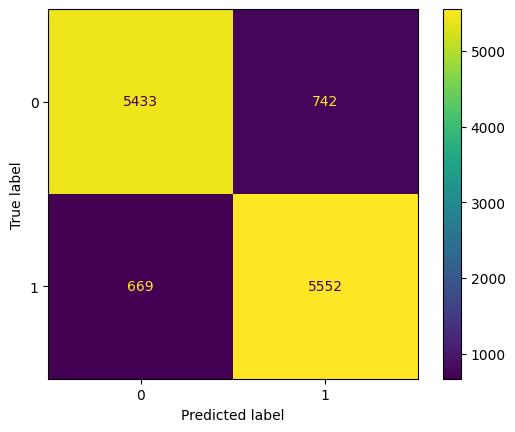

In [45]:
display.plot()